## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    out = keras.layers.Dense(units=output_units, 
                             activation="softmax", 
                             name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
            
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_exp = [1e-2, 1e-4, 1e-8, 1e-12]
l2_exp = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1 in l1_exp:
    for l2 in l2_exp:
        model = build_mlp(x_train.shape[-1], l1_ratio=l1, l2_ratio=l2)
        opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
        model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
        model.fit(x_train, y_train,
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1), str(l2))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
195/196 [============================>.] - ETA: 0s - loss: 197.9933 - accuracy: 0.2372WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000196AEC46318> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

196/196 [==============================] - 12s 61ms/step - loss: 2.4615 - accuracy: 0.0961 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 12s 62ms/step - loss: 2.4615 - accuracy: 0.0957 - val_loss: 2.4613 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 12s 61ms/step - loss: 2.4615 - accuracy: 0.0982 - val_loss: 2.4613 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 10s 52ms/step - loss: 2.4614 - accuracy: 0.0993 - val_loss: 2.4613 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 11s 56ms/step - loss: 2.4614 - accuracy: 0.0956 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 11s 58ms/step - loss: 2.4614 - accuracy: 0.1000 - val_loss: 2.4612 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 11s 56ms/step - loss: 2.4614 - accuracy: 0.0951 - val_loss: 2.4612 - val_accuracy: 0.10

196/196 [==============================] - 7s 35ms/step - loss: 2.4626 - accuracy: 0.0981 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 38/50
196/196 [==============================] - 7s 34ms/step - loss: 2.4626 - accuracy: 0.0997 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 39/50
196/196 [==============================] - 7s 35ms/step - loss: 2.4626 - accuracy: 0.0981 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 40/50
196/196 [==============================] - 7s 34ms/step - loss: 2.4626 - accuracy: 0.0964 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 41/50
196/196 [==============================] - 6s 32ms/step - loss: 2.4626 - accuracy: 0.0964 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 42/50
196/196 [==============================] - 7s 34ms/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 43/50
196/196 [==============================] - 7s 36ms/step - loss: 2.4626 - accuracy: 0.0971 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoc

196/196 [==============================] - 7s 38ms/step - loss: 2.4626 - accuracy: 0.0979 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 31/50
196/196 [==============================] - 7s 38ms/step - loss: 2.4626 - accuracy: 0.0982 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 32/50
196/196 [==============================] - 8s 39ms/step - loss: 2.4626 - accuracy: 0.0960 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 33/50
196/196 [==============================] - 9s 44ms/step - loss: 2.4626 - accuracy: 0.0979 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 34/50
196/196 [==============================] - 8s 40ms/step - loss: 2.4626 - accuracy: 0.0970 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 35/50
196/196 [==============================] - 8s 40ms/step - loss: 2.4626 - accuracy: 0.0971 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 36/50
196/196 [==============================] - 8s 43ms/step - loss: 2.4626 - accuracy: 0.0995 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoc

196/196 [==============================] - 11s 55ms/step - loss: 2.4626 - accuracy: 0.0965 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 24/50
196/196 [==============================] - 10s 54ms/step - loss: 2.4626 - accuracy: 0.0979 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 25/50
196/196 [==============================] - 12s 63ms/step - loss: 2.4626 - accuracy: 0.0987 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 26/50
196/196 [==============================] - 11s 55ms/step - loss: 2.4626 - accuracy: 0.0971 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 27/50
196/196 [==============================] - 11s 54ms/step - loss: 2.4626 - accuracy: 0.0986 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 28/50
196/196 [==============================] - 10s 54ms/step - loss: 2.4626 - accuracy: 0.0965 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 29/50
196/196 [==============================] - 14s 69ms/step - loss: 2.4626 - accuracy: 0.0980 - val_loss: 2.4627 - val_accuracy: 0.10

196/196 [==============================] - 11s 54ms/step - loss: 3.0737 - accuracy: 0.4436 - val_loss: 2.9608 - val_accuracy: 0.4428
Epoch 17/50
196/196 [==============================] - 10s 51ms/step - loss: 2.8527 - accuracy: 0.4448 - val_loss: 2.7733 - val_accuracy: 0.4406
Epoch 18/50
196/196 [==============================] - 11s 54ms/step - loss: 2.6663 - accuracy: 0.4497 - val_loss: 2.5817 - val_accuracy: 0.4508
Epoch 19/50
196/196 [==============================] - 13s 67ms/step - loss: 2.5119 - accuracy: 0.4483 - val_loss: 2.4713 - val_accuracy: 0.4294
Epoch 20/50
196/196 [==============================] - 13s 68ms/step - loss: 2.3823 - accuracy: 0.4493 - val_loss: 2.3403 - val_accuracy: 0.4431
Epoch 21/50
196/196 [==============================] - 11s 56ms/step - loss: 2.2775 - accuracy: 0.4506 - val_loss: 2.2832 - val_accuracy: 0.4190
Epoch 22/50
196/196 [==============================] - 11s 55ms/step - loss: 2.1900 - accuracy: 0.4519 - val_loss: 2.1915 - val_accuracy: 0.42

196/196 [==============================] - 10s 50ms/step - loss: 5.0540 - accuracy: 0.4763 - val_loss: 5.0356 - val_accuracy: 0.4665
Epoch 10/50
196/196 [==============================] - 9s 47ms/step - loss: 4.9659 - accuracy: 0.4838 - val_loss: 4.9584 - val_accuracy: 0.4706
Epoch 11/50
196/196 [==============================] - 9s 45ms/step - loss: 4.8811 - accuracy: 0.4891 - val_loss: 4.8807 - val_accuracy: 0.4773
Epoch 12/50
196/196 [==============================] - 9s 46ms/step - loss: 4.7965 - accuracy: 0.4963 - val_loss: 4.8153 - val_accuracy: 0.4801
Epoch 13/50
196/196 [==============================] - 9s 47ms/step - loss: 4.7149 - accuracy: 0.5054 - val_loss: 4.7238 - val_accuracy: 0.4861
Epoch 14/50
196/196 [==============================] - 9s 47ms/step - loss: 4.6353 - accuracy: 0.5091 - val_loss: 4.6633 - val_accuracy: 0.4860
Epoch 15/50
196/196 [==============================] - 9s 46ms/step - loss: 4.5552 - accuracy: 0.5158 - val_loss: 4.5814 - val_accuracy: 0.4885
Epo

196/196 [==============================] - 12s 61ms/step - loss: 5.7030 - accuracy: 0.3703 - val_loss: 5.6141 - val_accuracy: 0.3920
Epoch 3/50
196/196 [==============================] - 12s 61ms/step - loss: 5.5551 - accuracy: 0.4014 - val_loss: 5.5055 - val_accuracy: 0.4081
Epoch 4/50
196/196 [==============================] - 13s 66ms/step - loss: 5.4360 - accuracy: 0.4218 - val_loss: 5.3790 - val_accuracy: 0.4302
Epoch 5/50
196/196 [==============================] - 11s 54ms/step - loss: 5.3282 - accuracy: 0.4371 - val_loss: 5.2816 - val_accuracy: 0.4435
Epoch 6/50
196/196 [==============================] - 10s 51ms/step - loss: 5.2282 - accuracy: 0.4487 - val_loss: 5.1939 - val_accuracy: 0.4528
Epoch 7/50
196/196 [==============================] - 10s 51ms/step - loss: 5.1347 - accuracy: 0.4608 - val_loss: 5.1128 - val_accuracy: 0.4517
Epoch 8/50
196/196 [==============================] - 10s 52ms/step - loss: 5.0469 - accuracy: 0.4700 - val_loss: 5.0251 - val_accuracy: 0.4577
Epo

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - 11s 54ms/step - loss: 6.0043 - accuracy: 0.2758 - val_loss: 5.8020 - val_accuracy: 0.3401
Epoch 2/50
196/196 [==============================] - 10s 49ms/step - loss: 5.7136 - accuracy: 0.3655 - val_loss: 5.6247 - val_accuracy: 0.3878
Epoch 3/50
196/196 [==============================] - 9s 47ms/step - loss: 5.5653 - accuracy: 0.3952 - val_loss: 5.4978 - val_accuracy: 0.4126
Epoch 4/50
196/196 [==============================] - 11s 56ms/step - loss: 5.4442 - accuracy: 0.4152 - val_loss: 5.4089 - val_accuracy: 0.4231
Epoch 5/50
196/196 [==============================] - 12s 63ms/step - loss: 5.3318 - accuracy: 0.4350 - val_loss: 5.2822 - va

196/196 [==============================] - ETA: 0s - loss: 15.0990 - accuracy: 0.2641- ETA: 4s - l - ETA: 2s - loss: 15.4142 - acc - ETA: 1s - loss: 15.2633 - accura - ETA: 0s - loss: 15.1471 - accuracy: WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000196B75EF168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [============

Epoch 50/50
196/196 [==============================] - 14s 71ms/step - loss: 1.6105 - accuracy: 0.5262 - val_loss: 1.7037 - val_accuracy: 0.4799
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - ETA: 0s - loss: 2.1712 - accuracy: 0.2793WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000196AEFAA318> and will

196/196 [==============================] - 9s 46ms/step - loss: 1.1078 - accuracy: 0.6625 - val_loss: 1.4908 - val_accuracy: 0.5313
Epoch 44/50
196/196 [==============================] - 10s 51ms/step - loss: 1.0955 - accuracy: 0.6656 - val_loss: 1.5479 - val_accuracy: 0.5180
Epoch 45/50
196/196 [==============================] - 10s 49ms/step - loss: 1.0823 - accuracy: 0.6717 - val_loss: 1.4900 - val_accuracy: 0.5298
Epoch 46/50
196/196 [==============================] - 10s 51ms/step - loss: 1.0761 - accuracy: 0.6721 - val_loss: 1.5229 - val_accuracy: 0.5240
Epoch 47/50
196/196 [==============================] - 13s 64ms/step - loss: 1.0582 - accuracy: 0.6805 - val_loss: 1.5473 - val_accuracy: 0.5176
Epoch 48/50
196/196 [==============================] - 13s 68ms/step - loss: 1.0510 - accuracy: 0.6820 - val_loss: 1.5202 - val_accuracy: 0.5308
Epoch 49/50
196/196 [==============================] - 15s 78ms/step - loss: 1.0411 - accuracy: 0.6852 - val_loss: 1.5190 - val_accuracy: 0.532

196/196 [==============================] - 12s 63ms/step - loss: 1.0466 - accuracy: 0.6326 - val_loss: 1.4267 - val_accuracy: 0.4999
Epoch 37/50
196/196 [==============================] - 11s 56ms/step - loss: 1.0293 - accuracy: 0.6402 - val_loss: 1.3315 - val_accuracy: 0.5351
Epoch 38/50
196/196 [==============================] - 11s 55ms/step - loss: 1.0196 - accuracy: 0.6437 - val_loss: 1.3313 - val_accuracy: 0.5339
Epoch 39/50
196/196 [==============================] - 10s 50ms/step - loss: 1.0068 - accuracy: 0.6461 - val_loss: 1.4460 - val_accuracy: 0.5031
Epoch 40/50
196/196 [==============================] - 12s 61ms/step - loss: 0.9923 - accuracy: 0.6506 - val_loss: 1.4303 - val_accuracy: 0.5157
Epoch 41/50
196/196 [==============================] - 15s 75ms/step - loss: 0.9835 - accuracy: 0.6558 - val_loss: 1.3365 - val_accuracy: 0.5348oss: 0.9829 - accuracy: 
Epoch 42/50
196/196 [==============================] - 12s 64ms/step - loss: 0.9694 - accuracy: 0.6597 - val_loss: 1.5

196/196 [==============================] - 9s 46ms/step - loss: 1.1325 - accuracy: 0.6016 - val_loss: 1.3570 - val_accuracy: 0.5192
Epoch 30/50
196/196 [==============================] - 9s 45ms/step - loss: 1.1182 - accuracy: 0.6057 - val_loss: 1.3461 - val_accuracy: 0.5233
Epoch 31/50
196/196 [==============================] - 10s 50ms/step - loss: 1.1057 - accuracy: 0.6106 - val_loss: 1.3877 - val_accuracy: 0.5182
Epoch 32/50
196/196 [==============================] - 10s 49ms/step - loss: 1.0936 - accuracy: 0.6171 - val_loss: 1.3545 - val_accuracy: 0.5180
Epoch 33/50
196/196 [==============================] - 9s 45ms/step - loss: 1.0750 - accuracy: 0.6230 - val_loss: 1.3397 - val_accuracy: 0.5289
Epoch 34/50
196/196 [==============================] - 9s 47ms/step - loss: 1.0636 - accuracy: 0.6266 - val_loss: 1.3950 - val_accuracy: 0.5116
Epoch 35/50
196/196 [==============================] - 9s 47ms/step - loss: 1.0511 - accuracy: 0.6314 - val_loss: 1.3483 - val_accuracy: 0.5245
Ep

196/196 [==============================] - 10s 49ms/step - loss: 2.1705 - accuracy: 0.4810 - val_loss: 2.1601 - val_accuracy: 0.4734
Epoch 23/50
196/196 [==============================] - 9s 47ms/step - loss: 2.0957 - accuracy: 0.4827 - val_loss: 2.0849 - val_accuracy: 0.4791
Epoch 24/50
196/196 [==============================] - 9s 47ms/step - loss: 2.0331 - accuracy: 0.4840 - val_loss: 2.0377 - val_accuracy: 0.4697
Epoch 25/50
196/196 [==============================] - 9s 46ms/step - loss: 1.9767 - accuracy: 0.4883 - val_loss: 1.9876 - val_accuracy: 0.4721
Epoch 26/50
196/196 [==============================] - 9s 45ms/step - loss: 1.9297 - accuracy: 0.4906 - val_loss: 1.9389 - val_accuracy: 0.4840
Epoch 27/50
196/196 [==============================] - 9s 45ms/step - loss: 1.8893 - accuracy: 0.4927 - val_loss: 1.9063 - val_accuracy: 0.4749
Epoch 28/50
196/196 [==============================] - 9s 45ms/step - loss: 1.8535 - accuracy: 0.4934 - val_loss: 1.8610 - val_accuracy: 0.4884
Epo

196/196 [==============================] - 10s 50ms/step - loss: 1.4887 - accuracy: 0.5269 - val_loss: 1.5472 - val_accuracy: 0.4972
Epoch 16/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4677 - accuracy: 0.5349 - val_loss: 1.5589 - val_accuracy: 0.4904
Epoch 17/50
196/196 [==============================] - 10s 51ms/step - loss: 1.4524 - accuracy: 0.5367 - val_loss: 1.5387 - val_accuracy: 0.4964
Epoch 18/50
196/196 [==============================] - 10s 52ms/step - loss: 1.4345 - accuracy: 0.5433 - val_loss: 1.5397 - val_accuracy: 0.4976
Epoch 19/50
196/196 [==============================] - 10s 51ms/step - loss: 1.4206 - accuracy: 0.5481 - val_loss: 1.5104 - val_accuracy: 0.5094
Epoch 20/50
196/196 [==============================] - 10s 51ms/step - loss: 1.4041 - accuracy: 0.5553 - val_loss: 1.5218 - val_accuracy: 0.5026
Epoch 21/50
196/196 [==============================] - 10s 50ms/step - loss: 1.3891 - accuracy: 0.5605 - val_loss: 1.5037 - val_accuracy: 0.51

196/196 [==============================] - 9s 47ms/step - loss: 1.5133 - accuracy: 0.4699 - val_loss: 1.5179 - val_accuracy: 0.4674
Epoch 9/50
196/196 [==============================] - 9s 48ms/step - loss: 1.4835 - accuracy: 0.4792 - val_loss: 1.5022 - val_accuracy: 0.4694
Epoch 10/50
196/196 [==============================] - 9s 46ms/step - loss: 1.4577 - accuracy: 0.4886 - val_loss: 1.4820 - val_accuracy: 0.4730
Epoch 11/50
196/196 [==============================] - 9s 47ms/step - loss: 1.4324 - accuracy: 0.4984 - val_loss: 1.4909 - val_accuracy: 0.4710
Epoch 12/50
196/196 [==============================] - 9s 46ms/step - loss: 1.4094 - accuracy: 0.5055 - val_loss: 1.4691 - val_accuracy: 0.4761
Epoch 13/50
196/196 [==============================] - 9s 45ms/step - loss: 1.3876 - accuracy: 0.5134 - val_loss: 1.4391 - val_accuracy: 0.4842
Epoch 14/50
196/196 [==============================] - 9s 47ms/step - loss: 1.3667 - accuracy: 0.5184 - val_loss: 1.4350 - val_accuracy: 0.4914
Epoch

Epoch 2/50
196/196 [==============================] - 9s 48ms/step - loss: 1.7885 - accuracy: 0.3741 - val_loss: 1.7515 - val_accuracy: 0.3840
Epoch 3/50
196/196 [==============================] - 9s 48ms/step - loss: 1.7077 - accuracy: 0.4016 - val_loss: 1.6849 - val_accuracy: 0.4090
Epoch 4/50
196/196 [==============================] - 10s 49ms/step - loss: 1.6501 - accuracy: 0.4249 - val_loss: 1.6481 - val_accuracy: 0.4243
Epoch 5/50
196/196 [==============================] - 9s 46ms/step - loss: 1.6043 - accuracy: 0.4414 - val_loss: 1.5991 - val_accuracy: 0.4360
Epoch 6/50
196/196 [==============================] - 9s 45ms/step - loss: 1.5658 - accuracy: 0.4532 - val_loss: 1.5594 - val_accuracy: 0.4501
Epoch 7/50
196/196 [==============================] - 9s 45ms/step - loss: 1.5323 - accuracy: 0.4645 - val_loss: 1.5445 - val_accuracy: 0.4581
Epoch 8/50
196/196 [==============================] - 9s 45ms/step - loss: 1.5033 - accuracy: 0.4731 - val_loss: 1.5154 - val_accuracy: 0.463

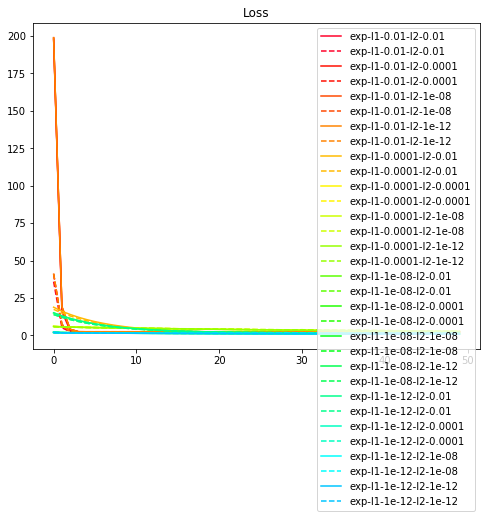

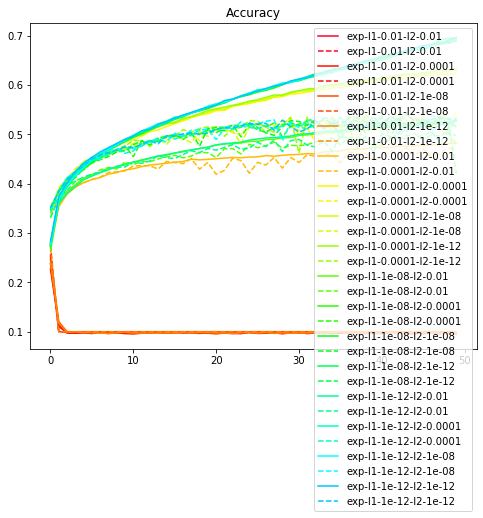

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()